In [1]:
import numpy as np
import sys 
import os
import matplotlib.pyplot as plt
os.chdir('/storage/filament/codes/')
from utils import *

In [2]:
save_dir = '/storage/filament/cluster_cropped/'
xray = np.genfromtxt('/storage/filament/256den18g+1024',dtype='float64')

In [ ]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
    
os.chdir(save_dir)

In [4]:
length = 256
sliced_index = 128

xray_mat = xray.reshape(256,256,256)

xray_2d = xray_mat[:,:,sliced_index]



In [5]:
volume_constant = (10**-2)*( (200/2048) * (3.086/0.7))**3

In [7]:
xray_2d_log_volume = np.log10(xray_2d*volume_constant)

In [8]:
cluster_pics, ix_index, iy_index = cluster_crop(xray_2d_log_volume,12,-6)

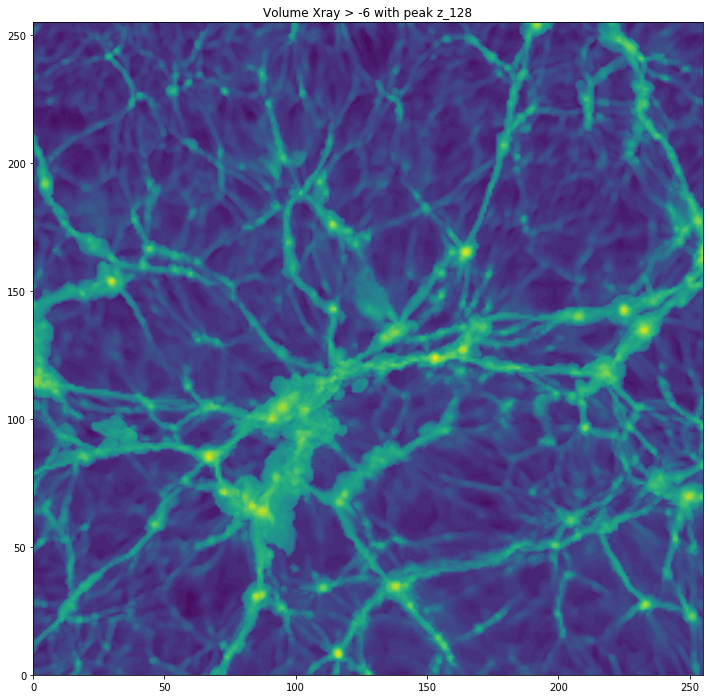

In [33]:
plt.figure(figsize=[12,12])
plt.contourf(xray_2d_log_volume,50)
#plt.scatter(iy,ix,c='red')
plt.title('Volume Xray > -6 with peak' + ' z_' + str(sliced_index))
title_fig = 'Volume Xray > -6 with peak' + ' z_' + str(sliced_index)

save_result('/storage/filament/result/',title_fig)

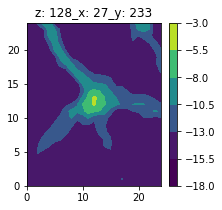

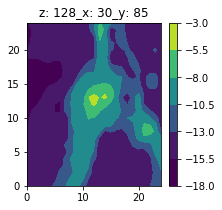

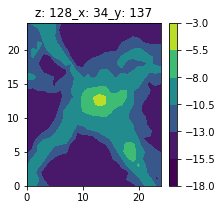

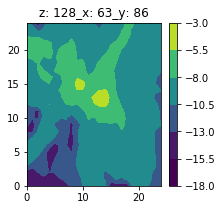

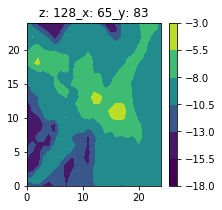

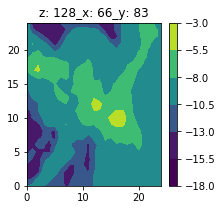

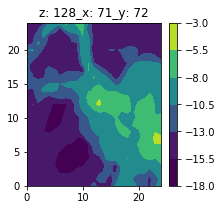

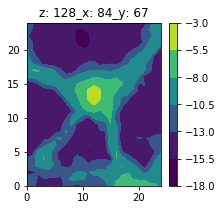

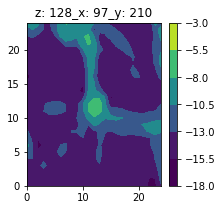

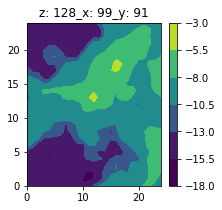

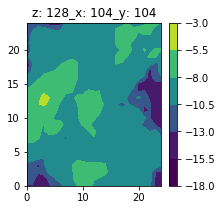

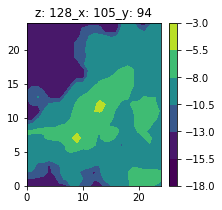

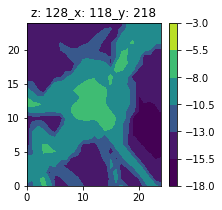

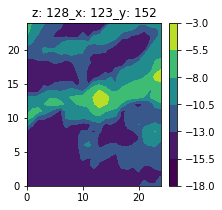

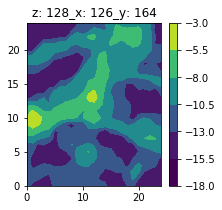

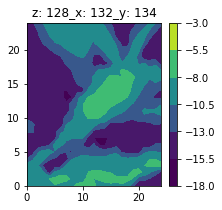

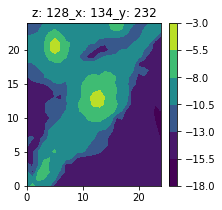

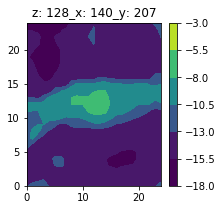

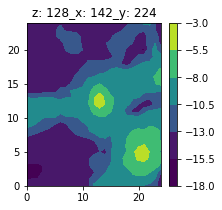

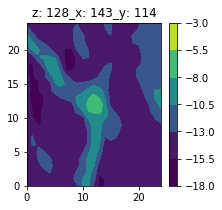

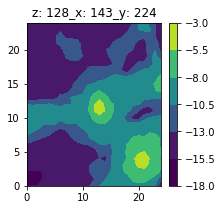

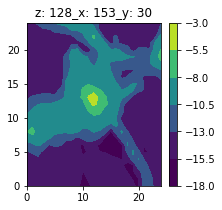

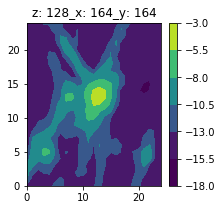

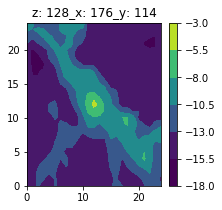

In [30]:
levels=np.linspace(-18,-3,7)

for i in range(len(cluster_pics)-1):
    plt.figure(figsize=[3,3])
    plt.contourf(cluster_pics[:,:,i],levels)
    plt.clim(-15, -3)
    plt.colorbar()
    plt.title('z: ' + str(sliced_index) + '_x: ' + str(ix_index[i]) +'_y: ' + str(iy_index[i])  )
    title = str( 'z: ' + str(sliced_index) + '_x: ' + str(ix_index[i]) +'_y: ' + str(iy_index[i]) )
    save_result(save_dir,title)
    plt.show()
#print(len(clusters))

In [19]:
np.save('z_' + str(sliced_index),cluster_pics)